consider y(x) = (8 x, 15 x)
want to build a simple model with 1 hidden layer, to test if the model works correctly

In [38]:
# test forward
import debugger as deb
import importlib
import network0
import numpy as np
import random
importlib.reload(network0)

layers = np.array([2,3,2])
weights = [np.array([[1,1],[2,2],[3,3]]), np.array([[1,2,3],[4,5,6]])]
biases = [np.array([0,0,0]), np.array([0,0])]

model_0 = network0.network(layers=layers, weights=weights, biases=biases)

model_0.forward(np.array([10,-1.2354236]))


([array([10.       , -1.2354236]),
  array([ 8.7645764, 17.5291528, 26.2937292]),
  array([122.7040696, 280.4664448])],
 [array([10.       , -1.2354236]),
  array([ 8.7645764, 17.5291528, 26.2937292]),
  array([122.7040696, 280.4664448])])

In [68]:
def get_rand():
    x = np.random.random()
    y = np.random.random()
    return [x,x]

def create_data(len):
    np.random.seed(42)
    ret = []
    ret.append(np.array([np.array(get_rand()) for i in range(len)]))
    ret.append(np.array([np.array([8*sub[0], 15*sub[1]]) for sub in ret[0]]))
    return ret

epoch: 0 | loss: 0.026847840528874945
epoch: 1 | loss: 0.018243133167452213
epoch: 2 | loss: 0.013163367495792942
epoch: 3 | loss: 0.009903370515270899
epoch: 4 | loss: 0.007679848746326534
epoch: 5 | loss: 0.006092995771709719
epoch: 6 | loss: 0.004920375128372224
epoch: 7 | loss: 0.0040295194506747714
epoch: 8 | loss: 0.0033371883088482578
epoch: 9 | loss: 0.002788802311916625
epoch: 10 | loss: 0.0023473417780790896
epoch: 11 | loss: 0.0019870021208699016
epoch: 12 | loss: 0.0016893858654799762
epoch: 13 | loss: 0.0014411197166736872
epoch: 14 | loss: 0.0012323104561597325
epoch: 15 | loss: 0.0010555158077073263
epoch: 16 | loss: 0.0009050434520670209
epoch: 17 | loss: 0.0007764658795568241
epoch: 18 | loss: 0.0006662808388355463
epoch: 19 | loss: 0.000571671825779269
epoch: 20 | loss: 0.0004903381340524243
epoch: 21 | loss: 0.00042037358297867985
epoch: 22 | loss: 0.00036017938302578266
epoch: 23 | loss: 0.0003084009327206059
epoch: 24 | loss: 0.00026388136987275855
epoch: 25 | loss

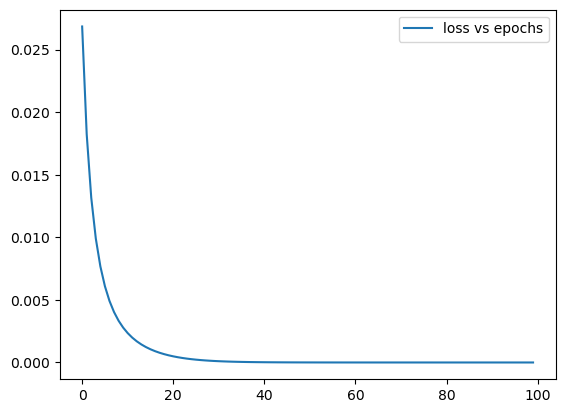

[15.99965184 29.99971368]


In [78]:
# test SGD
import importlib
import network0
import numpy as np
import random
importlib.reload(network0)
#create data
random.seed(42)


layers = np.array([2,3,2])
train_data = create_data(100)
validation_data = create_data(100)

# print(train_data[:10])
# print(validation_data[:10])

net = network0.network(layers=layers, seed_value=42)
net.SGD(train_data=train_data, eta=0.01, epochs=100, batch_size=10, loss_fn=network0.mean_square_error, dloss_fn=network0.dmean_square_error, seed_value=10, report=True, validation_data=validation_data)


print(net.forward(np.array([2,2])))


In [55]:
net.forward(np.array([1,2]), evaluation=True)

array([11.94838817, 22.71401993])

In [37]:
test = create_data(5)
print(type(test[0][0]))
print(test[0][0])
print(test)

<class 'numpy.ndarray'>
[0.37454012 0.37454012]
[array([[0.37454012, 0.37454012],
       [0.95071431, 0.95071431],
       [0.73199394, 0.73199394],
       [0.59865848, 0.59865848],
       [0.15601864, 0.15601864]]), array([[ 2.99632095,  5.61810178],
       [ 7.60571445, 14.2607146 ],
       [ 5.85595153, 10.97990913],
       [ 4.78926787,  8.97987726],
       [ 1.24814912,  2.34027961]])]
